In [3]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import matplotlib.pyplot as plt 
import matplotlib 
matplotlib.style.use('ggplot')

html=urlopen(
    "https://www.imdb.com/chart/top/?ref_=nv_mv_250"
).read()
soup= BeautifulSoup(html,features='lxml')

movie=soup.find_all("td",{"class":"titleColumn"})
rating=soup.find_all('td',{"class":"ratingColumn imdbRating"})


name_list=[]
year_list=[]
score_list=[]
for m in movie:
    title=m.find("a").get_text()
    name_list.append(title)
    year=m.find("span").get_text().strip("()")
    year_list.append(year)
    
for r in rating:
    score=r.get_text().strip()
    score_list.append(score)

df=pd.DataFrame({"movie":name_list, "year":year_list, "rate":score_list})
df



movie  year rate
0                          The Shawshank Redemption  1994  9.2
1                                     The Godfather  1972  9.1
2                            The Godfather: Part II  1974  9.0
3                                   The Dark Knight  2008  9.0
4                                      12 Angry Men  1957  8.9
..                                              ...   ...  ...
245                           The Battle of Algiers  1966  8.0
246                                 Throne of Blood  1957  8.0
247                                      Hera Pheri  2000  8.0
248                                          Swades  2004  8.0
249  Neon Genesis Evangelion: The End of Evangelion  1997  8.0

[250 rows x 3 columns]

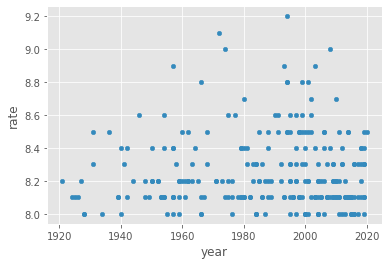

In [4]:
df.year=pd.to_numeric(df.year)
df.rate=pd.to_numeric(df.rate)
df.plot("year","rate",kind="scatter")
